In [198]:
import os, os.path
import pandas as pd
import cv2 as cv
import numpy as np

import matplotlib.pyplot as plt

In [199]:
def load():
    list = ["apples", "oranges", "pears", "pineapples", "watermelons"]
    fruits = []

    for dir in list:
        path = os.getcwd() + r"\own_dataset" + f"\{dir}"
        for image in os.listdir(path):
            image = cv.imread(path + f"\{image}")
            rgb_image = cv.merge([image[:, :, 2], image[:, :, 1], image[:, :, 0]])
            fruits.append(rgb_image)
    
    return np.array(fruits)

In [200]:
def plot_sample(sample_index, samples):
    plt.imshow(samples[sample_index])
    plt.show()


In [201]:
def meanNormalization(samples):
    return samples - np.mean(samples, axis=0)

def standardization(samples):
    return meanNormalization(samples) / np.std(samples, axis=0)

def whiten(samples):
    print(samples.shape)
    flattened = samples.reshape(samples.shape[0], samples.shape[1] * samples.shape[2] * samples.shape[3])
    centered_samples = standardization(flattened)

    print(centered_samples.shape)

    cov = np.cov(centered_samples, rowvar=False)

    U, S, V = np.linalg.svd(cov)

    epsilon = 1e-5

    X_ZCA = U.dot(np.diag(1.0 / np.sqrt(S + epsilon))).dot(U.T).dot(centered_samples.T).T

    whitened = X_ZCA.reshape(samples.shape)

    return whitened

def scale_samples(samples):
    return (samples - samples.min()) / (samples.max() - samples.min())


def plot_steps(samples, index):
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 2, 1)
    plt.imshow(samples[index])
    plt.title("Original")

    plt.subplot(2, 2, 2)
    normalized = meanNormalization(samples)
    plt.imshow(scale_samples(normalized)[index])
    plt.title("Mean Normalization")

    plt.subplot(2, 2, 3)
    standardized = standardization(samples)
    plt.imshow(scale_samples(standardized)[index])
    plt.title("Standardization")

    plt.subplot(2, 2, 4)
    whitened = whiten(samples)
    plt.imshow(scale_samples(whitened)[index])
    plt.title("Whitening")

    plt.show()


(25, 28, 28, 3)
(25, 2352)


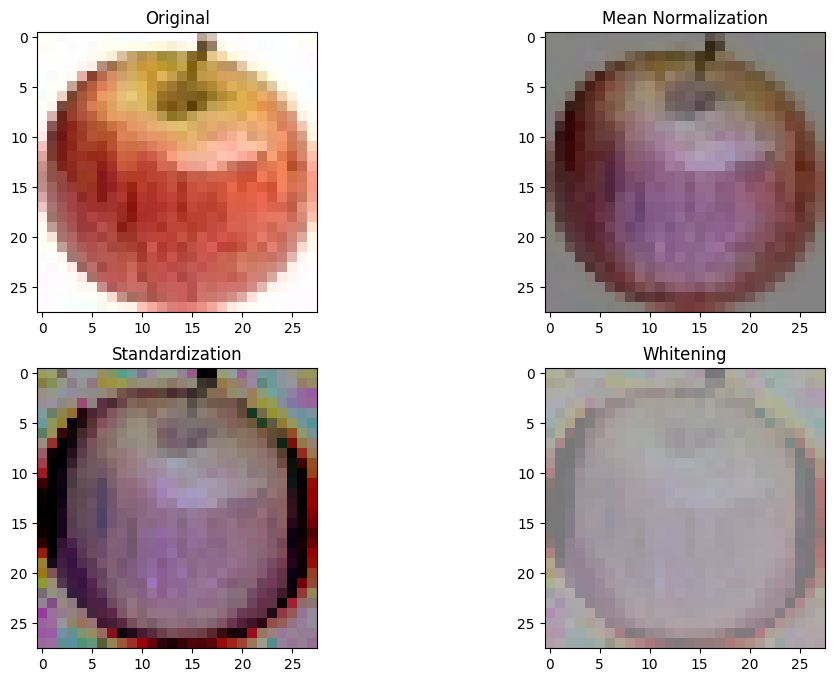

In [202]:
fruit_array = load()
plot_steps(fruit_array, 0)